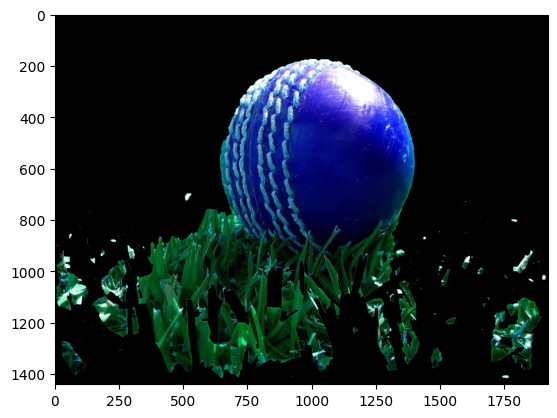

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('images/cric.jpg')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
def graph_cut_segmentation(images,gray_image):


    # Create a mask and initialize the grabCut algorithm
    mask = np.zeros(gray_image.shape, np.uint8)
    bgd_model = np.zeros((1, 65), np.float64)
    fgd_model = np.zeros((1, 65), np.float64)

    # Define rectangle (for rough initialization)
    rect = (4, 4, image.shape[1]-10, image.shape[0]-10)

    # Apply the grabCut algorithm
    cv2.grabCut(image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

    # Modify the mask to create the final segmented output
    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
    result = image * mask2[:, :, np.newaxis]
    plt.imshow(result)

# Example usage:
graph_cut_segmentation(image,gray_image)

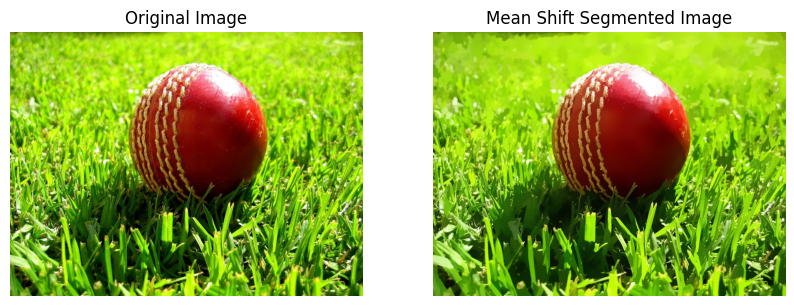

In [6]:
def mean_shift_segmentation(image,gray_image, spatial_radius=30, color_radius=30, max_level=2):


    # Apply the MeanShift algorithm
    shifted = cv2.pyrMeanShiftFiltering(image, sp=spatial_radius, sr=color_radius, maxLevel=max_level)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the original and segmented images
    plt.figure(figsize=(10, 5))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title("Original Image")
    plt.axis('off')

    # Segmented image
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(shifted, cv2.COLOR_BGR2RGB))
    plt.title("Mean Shift Segmented Image")
    plt.axis('off')

    plt.show()

# Example usage:
mean_shift_segmentation(image,gray_image)

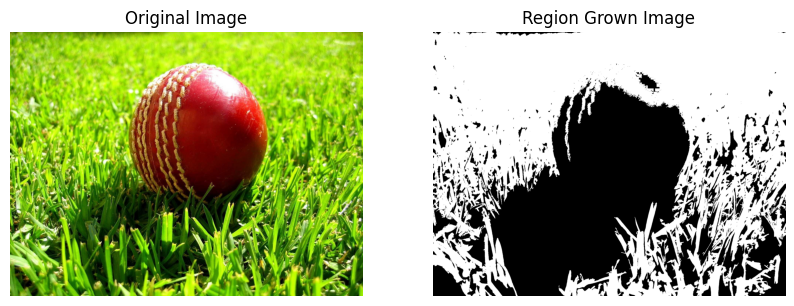

In [7]:
seed = (100, 100)  # Example seed point (x, y)
threshold =70 # Threshold for similarity (intensity difference)
region_grown = np.zeros_like(gray_image)  # Binary image to store the grown region
visited = np.zeros_like(gray_image, dtype=bool)  # To track visited pixels

# Region growing process
seed_intensity = gray_image[seed]

# Stack for region growing (starts with the seed)
stack = [seed]

while stack:
    x, y = stack.pop()

    # Skip if pixel is already visited
    if visited[x, y]:
        continue

    # Mark the current pixel as visited
    visited[x, y] = True

    # Check if the pixel is within the threshold range
    if abs(int(gray_image[x, y]) - int(seed_intensity)) <= threshold:
        region_grown[x, y] = 255  # Mark as part of the region

        # Add neighboring pixels to the stack
        if x > 0:
            stack.append((x - 1, y))  # Up
        if x < gray_image.shape[0] - 1:
            stack.append((x + 1, y))  # Down
        if y > 0:
            stack.append((x, y - 1))  # Left
        if y < gray_image.shape[1] - 1:
            stack.append((x, y + 1))  # Right

# Visualize the original and segmented image
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# Region grown image
plt.subplot(1, 2, 2)
plt.imshow(region_grown, cmap='gray')
plt.title("Region Grown Image")
plt.axis('off')

plt.show()


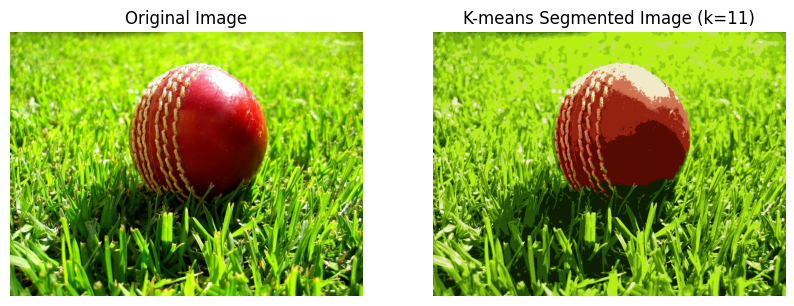

In [9]:
from sklearn.cluster import KMeans

# Reshape the image into a 2D array of pixels (each row is a pixel, each column is a color channel)
pixels = image_rgb.reshape((-1, 3))

# Apply KMeans clustering
k = 11 # Number of clusters (you can change this)
kmeans = KMeans(n_clusters=k)
kmeans.fit(pixels)

# Get the labels (which cluster each pixel belongs to)
labels = kmeans.labels_

# Get the cluster centers (the RGB values of the clusters)
centroids = kmeans.cluster_centers_

# Map the labels to the cluster centers (to assign each pixel to the color of its cluster)
segmented_image = centroids[labels].reshape(image_rgb.shape)

# Display the original and segmented images side by side
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

# Segmented image
plt.subplot(1, 2, 2)
plt.imshow(segmented_image.astype(int))
plt.title(f"K-means Segmented Image (k={k})")
plt.axis('off')

plt.show()


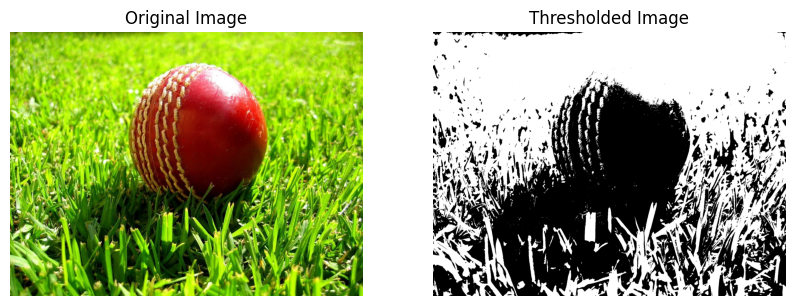

In [10]:
threshold_value = 127

# Apply the binary thresholding
_, thresholded_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)

# Display the original and thresholded images side by side
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# Thresholded image
plt.subplot(1, 2, 2)
plt.imshow(thresholded_image, cmap='gray')
plt.title("Thresholded Image")
plt.axis('off')

plt.show()